# Land Use and Land Cover Classification using Deep Learning Architecture  
  
The aim of this notebook is to understand more about using machine learning techniques for image classification and how it can be applied to land use and land cover data, as well as working on my knowledge of Python. Which, right now, is still pretty iffy :-)  
  
I will do this by following along with the notebook written by Luigi Selmi on Medium and explain as much as I can, with added notes about the process, algorithms and python code for my own notes.  
  
The structure of the example notebook uses a Convolutional Neural Network and a tranfser learning technique that consists of a pretrained ResNet CNN architecture, which will then be fine-tuned with the EuroSAT dataset - a collection of labelled satellite patch images extracted from the COpernicus Sentinel-2 satellite products.  
It uses the Fastai deep learning library to write the Python code to train the model, validate the system. Luigi uses Google Colab to execute the code on a GPU, but I will try on my own laptop first.  
Some additional LULC classificationtests were carried out using new images extracted from the Copernicus Sentinel-2 dataset productes thorugh the Sentinal Hub EO-Browser.  
  
https://github.com/luigiselmi/copernicus/blob/main/deeplearning_land_use_land_cover_classification.ipynb

## Land Use and Land Cover (LULC) Classification  
  
 - **Land cover** indicates the type of surface.  
 - **Land use** indicates how the land is used.  
 - This data is extracted from aerial images or satellite digital images whose pixel values represent the solar energy reflected by the Earth's surface in different spectral bands 
 - Land cover classes are determined by using some combinations of spectral bands
 - Vegetation has a stronger reflectance in near infrared region - so can be better observed using those type of spectral bands
 - In the visible region, dry grass has a stronger reflectance in band 4 (red) than in blue and green (B2, B3).  
 - Classical machine learning algorithms, such as Random Forests or Support Vector Machines are used to improve the accuracy of the classification.  
 - However, spectral data at the pixel level alone cannot provide information about land use and the whole of a patch image has to be considered to infer its use.
 - Additional info is often required to understand how the land is being used
 - There are several classification systems currently, that categorise land cover
   - CORINE, Land Cover Classification System, EUNIS Level 2, UK BAP Broad Habitat, MODIS Land Cover Type
   - CORINE contains 44 classes, carried out every 6 years by the Copernicus Land Monitoring Service (Europe)
 - 


## The Copernicus Sentinel-2 Satellites  
  
Here is some explanation about the satellite system:  
 - The Copernicus Sentinel-2 constellation is based on two identical satellites for earth observation 
 - European Space Agency (ESA)
 - Each satellite flights on a Sun synchronous polar orbit at 786 km altitude, 180° apart from each other so that the same area can be revisited every 5 days
 - Both satellites carry a high spatial resolution multispectral imager (MSI) with a 290 km swath that can collect the solar energy reflected by the Earth surface in 13 spectral bands, from the visible to the near-infrared spectral range
 - The spatial resolution ranges from 10 m per pixel (B2, B3, B4, and B8 bands) down to 60 m per pixel
 - The ESA processes the raw data for radiometric calibration, orthorectification, atmospheric correction and georeferencing, and delivers the processed images as Level-1C (L1C) and Level-2A (L2A) data products
 - Both products are delivered as 100 km x 100 km tiles in UTM/WGS84 projection
 - L1C products are not processed for atmospheric correction and are described as Top-Of-Atmosphere reflectance data, while L2A products have received atmospheric correction and are described as Bottom-Of-Atmosphere reflectance data
 - L1C and L2A products can be obtained under an open access license from the Copernicus Open Access Hub or from other providers such as Sentinel-Hub
 - 

## The EuroSAT Dataset  
  
 - images extracted from the Sentinal-2a L1C products
 - covers 34 European countries over a year  
 - Two subsets: RGB and multispectral   
 - 27000 images in each dataset  
 - Classes defined to label the images are a subset of those defined in the CORINE
   - Pasture  
   - HerbaceousVegetation  
   - Industrial  
   - AnnualCrop  
   - Residential  
   - PermanentCrop  
   - Highway  
   - SeaLake  
   - Forest  
   - River  
 - Multispectral data = 13 spectral bands available from MSI sensor
 - size of each patch is 64x64 pixels with 10 m resolution

## ResNet Architecture  
  
 - A **Convolutional Neural Network** requires an _ARCHITECTURE_ with many layers to achieve good accuracy  
 - This will allow it to learn, distinguishing between different types of land covers  
 - Influenced by geometries and reflectance properties, which can be mixed in many different ways  
 - These Architectures are expensive to train from scratch:
   - requires large amounts of labeled data for training  
   - time  
   - computing resources  
 - Using a pretrained model will save some of this expense  
 - For example: using a model that has been trained previously on a large, different dataset  such as ImageNet, and then we can finetune it with data specific to our task  
 - **Finetuning** is a _transfer learning technique_ - parameters of a pretrained network architecture are updated using the new data  
 - In this example, we use the ResNet 50 architecture
   - pretrained on ImageNet dataset
 - Using the `fastai` deep learning library to implement the functions  
 - 

In [12]:
import fastai
from fastai.vision.all import *
import pyhere

here = pyhere.here()

## Setting and loading the data - downloading and unzipping the files  
  
- first use pyhere to set root folder
- need to create a .here or .gitignore file for here to use as a reference 
- define the url  
- define destination path using here()
- use the untar_data() function with url and destination path
- untar_data() has extra arguments including `data` 
  - this overrides the `Config`'s `data` key and can be used to specify where the data should be extracted  
  - `base` sets the base directory for relative paths - default is '~/.fastai but can be changed  
  - `c_key` specifies key in the configuration where to extract the file  
  - 

In [13]:
# Download the EuraSAT RGB images from dfki 
# path = untar_data('http://madm.dfki.de/files/sentinel/EuroSAT.zip',
#                  c_key=pyhere.here('data'))

url = 'http://madm.dfki.de/files/sentinel/EuroSAT.zip'
dest = pyhere.here('data', 'raw')

path = untar_data(url, data=dest)
print(f"Data extracted to {path}")

Data extracted to f:\venvs\LULC_Practice\notebooks\..\data\raw\EuroSAT


In [14]:
Path.BASE_Path = path
path.ls()

(#10) [Path('f:/venvs/LULC_Practice/notebooks/../data/raw/EuroSAT/AnnualCrop'),Path('f:/venvs/LULC_Practice/notebooks/../data/raw/EuroSAT/Forest'),Path('f:/venvs/LULC_Practice/notebooks/../data/raw/EuroSAT/HerbaceousVegetation'),Path('f:/venvs/LULC_Practice/notebooks/../data/raw/EuroSAT/Highway'),Path('f:/venvs/LULC_Practice/notebooks/../data/raw/EuroSAT/Industrial'),Path('f:/venvs/LULC_Practice/notebooks/../data/raw/EuroSAT/Pasture'),Path('f:/venvs/LULC_Practice/notebooks/../data/raw/EuroSAT/PermanentCrop'),Path('f:/venvs/LULC_Practice/notebooks/../data/raw/EuroSAT/Residential'),Path('f:/venvs/LULC_Practice/notebooks/../data/raw/EuroSAT/River'),Path('f:/venvs/LULC_Practice/notebooks/../data/raw/EuroSAT/SeaLake')]

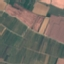

In [17]:
# Check a single image from the PermanentCrop folder
fname = (path/'PermanentCrop').ls()[0]
fname

# open image
img = Image.open(fname)
img

In [18]:
# Use regular expression to extract the label from the file name
re.findall(r'(.+)_\d+.jpg$', fname.name)

['PermanentCrop']

## Define the DataLoaders, test & validation sets, transformations to be applied   
  
 - fastai provides classes and functions to:
   - specify type of example data (images, text files, tables)
   - specify which transformations must be applied on them (resizing, cropping)
   - specify how to find the images in the file system
   - how to extract their labels (classes)
   - how to split the EuroSAT dataset into a training set and validation set  
 - We can also _artificially_ increase the number of images using the **data augmentation technique**  
 - fastai has a function that creates more images from the dataset through applying transformations (flipping, rotation, brightness modification etc)  
 - Splitting into training & validation:
   - use default 80:20 split  
 - The **main** step is to transform all images in PyTorch sensors (maybe not for me in this practice session)  
   - multiple float arrays that can be sent in batches to a GPU for computations  
 - fastai `DataBlock` class creates batches of images as 4 dimensional tensors for both the training & validation steps  
 - A _batch sensor_ whose dimensions are BxCxHxW 
   - B = batch size
   - C = channels
   - H = height
   - W = width
 - 

In [19]:
# defining data, sets, transformations  
set_seed = 42 # set seed for reproducibility
blocks = DataBlock(
    blocks = (
        ImageBlock, 
        CategoryBlock
    ),
    get_items = get_image_files, # finds images in path
    splitter = RandomSplitter(seed = set_seed), # splits data into training and validation sets
    get_y = using_attr(
        RegexLabeller(r'(.+)_\d+.jpg$'), 'name'
    ), # extracts label from file name
    batch_tfms = aug_transforms(mult = 2) # data augmentation (mult multiplies default values)
    )

In [20]:
dls = blocks.dataloaders(path)

In [21]:
# Check data loader is configured correctly
blocks.summary(path)

Setting-up type transforms pipelines
Found 27000 items
2 datasets of sizes 21600,5400
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      f:\venvs\LULC_Practice\notebooks\..\data\raw\EuroSAT\HerbaceousVegetation\HerbaceousVegetation_1790.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=64x64
  Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      f:\venvs\LULC_Practice\notebooks\..\data\raw\EuroSAT\HerbaceousVegetation\HerbaceousVegetation_1790.jpg
    applying partial gives
      HerbaceousVegetation
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(2)

Final sample: (PILImage mode=RGB size=64x64, TensorCategory(2))


Found 27000 items
2 datasets of sizes 21600,5400
Setting up Pipeline: PILBase.create
Setting up Pipelin

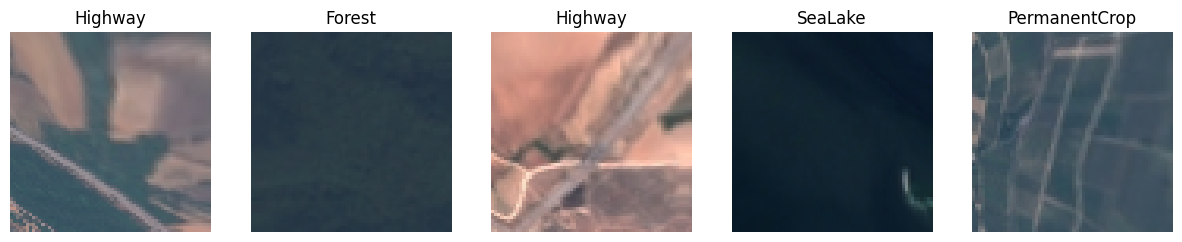

In [22]:
# show some pictures in one batch with labels
dls.show_batch(nrows = 1,
               ncols = 5)

## Data Augmentation  
  
 - Additional images created in previous step  
 - using data augmentation technique implemented by fastai `aug_transforms()` function  
- 


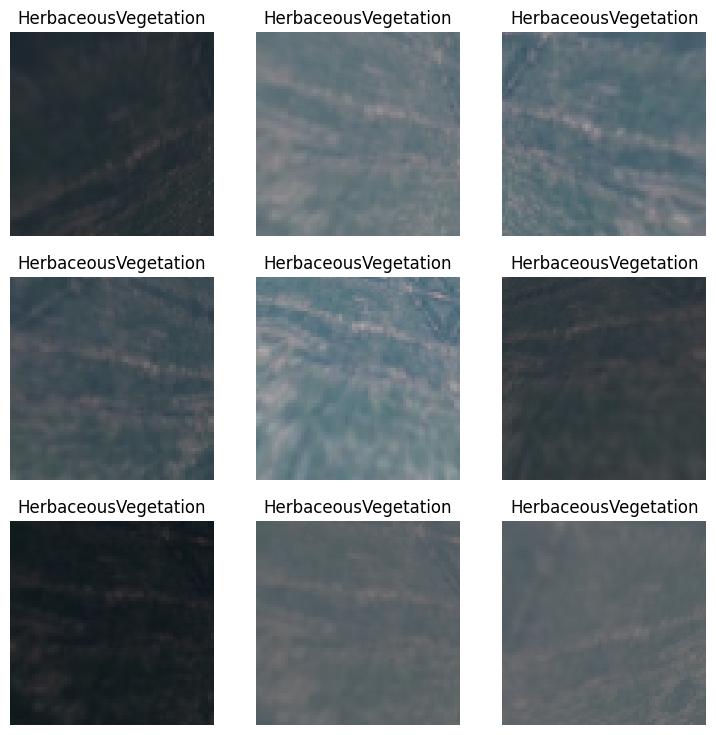

In [24]:
# show created/augmented images  
blocks = blocks.new(
    batch_tfms = aug_transforms(mult = 2.0)
)
dls = blocks.dataloaders(path)
dls.train.show_batch(nrows = 3,
                     unique = True)

## Set up the ResNet50 ConvNet pretrained architecture  
  
 - ResNet50 is a pretrained architecture  
 - we can use the EuroSAT dataset to finetune the architeture for our specific needs  
 - finetune the metric we use to check whether the model achieves our expectations  
 - for example, using _accuracy_ as a metric computed from the error rate (accuracy = 1 - error_rate)
 - ResNet50 CNN contains a sequence of blocks of 3 convolutional layers each - for a total of 50 layers  
   - each block contains a short-cut connection from input to the output  
   - it learns the difference between these layers  
   - this is the residual  
   - Using ResNet50 CNN avoids the problem of degradation (HOW?)
   - The number of parameters in ResNet50 don't depend on the size of the images  
   - The number of channels, _feature maps_, and their size are always the same at each layer
   - This allows the original ResNet50 parameters that were computed using 224x224 pixels images to be updated during the finetuning process using images of a different size, e.g. 64x64 pixels images of the EuroSAT dataset  
   - the _final layer_ reduces the tensor to a one dimensional vector of size 10 - the number of classes -
   - these are sent to a softmax layer that computes the probabilities of each image to be a member of any o the 10 classes  
   - the fastai convenience function `cnn_learner()` is used to customise the learning process
     - sets different hyperparameters such as the optimiser (stochastic gradient descent), the loss function, the learning rate, etc  
   -  


In [25]:
# Summary of architecture before finetuning
learn = cnn_learner(dls,
                     resnet50,
                     metrics = accuracy)
learn.summary()

f:\venvs\LULC_Practice\.venv\Lib\site-packages\fastai\vision\learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to C:\Users\nuvra/.cache\torch\hub\checkpoints\resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:04<00:00, 24.0MB/s]


Sequential (Input shape: 64 x 3 x 64 x 64)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 64 x 32 x 32   
Conv2d                                    9408       False     
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     64 x 64 x 16 x 16   
MaxPool2d                                                      
Conv2d                                    4096       False     
BatchNorm2d                               128        True      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
____________________________________________________________________________
                     64 x 256 x 16 x 16  
Conv2d                                    16384      False     
BatchNorm2d                          

### Finetuning  
  
 - we load the architecture with pretrained parameters  
 - set number of epochs  
   - aim to set for optimal between accuracy and computational time and resource  
   - can run through multiple epoch times to find optimal 
   - fastai provides a convenience function that can run through these
 - in an epoch:
   - a batch of images is used to compute an average value of the loss
   - update the model parameters before using the next batch
   - repeats until all batches have been used and new epoch starts
 - 

In [28]:
# finetune
learn.fine_tune(20)

epoch,train_loss,valid_loss,accuracy,time
0,0.757730,0.418718,0.859630,03:05


epoch,train_loss,valid_loss,accuracy,time
0,0.465947,0.246364,0.917407,04:05
1,0.335388,0.171515,0.942593,04:00
2,0.273747,0.144116,0.952963,03:54
3,0.220435,0.110503,0.964074,03:53
4,0.204481,0.084662,0.972222,03:53
5,0.172393,0.091170,0.969630,03:54
6,0.141683,0.097622,0.971296,03:55
7,0.138844,0.082063,0.974444,03:59
8,0.122357,0.075263,0.977222,04:09
9,0.102849,0.083233,0.975741,03:58


Plot the accuracy


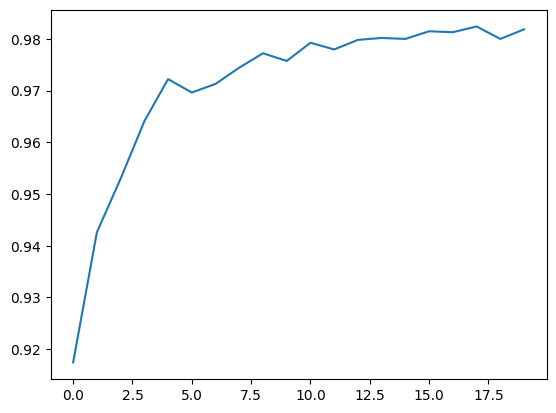

In [29]:
plt.plot(L(
    learn.recorder.values
).itemgot(2)
);
plt.show()

### Model Evaluation  
  
 - understand what the accuracy of the model is with regards to classifying images  
   - for example - spectral response of rivers and roads is similar in the visible part of the spectrum as they absorb most of solar radiation
   - seen from a long distance within a patch of 640x640m could be confusing  
   - so we could expect some of these parts of the images to be misidentified as one or the other  
   - There may also be other habitats that are unclear when compared o others  
 - A **confusion matrix** using the validation data can help check which classes have had misclassifications  

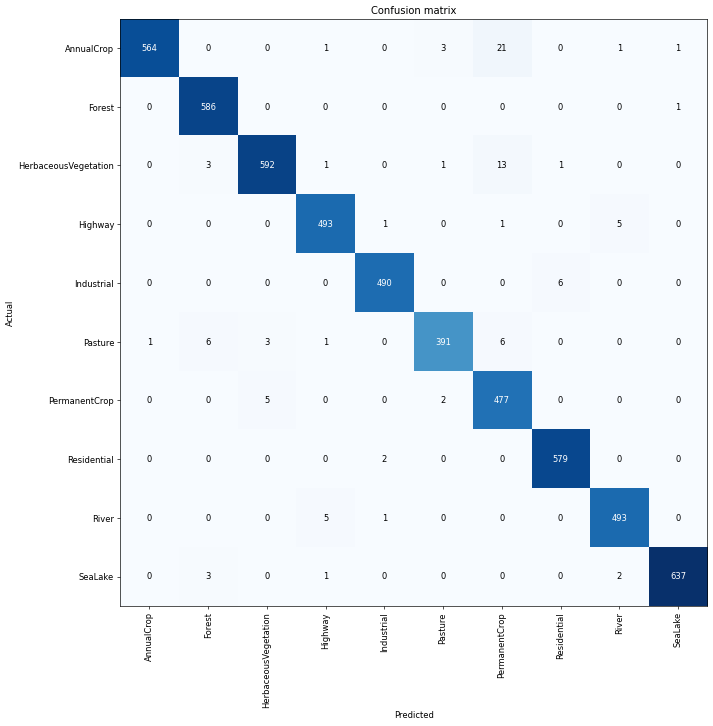

In [30]:
# plot confusion matrix
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize = (12, 12),
                             dpi = 60)

In [31]:
# select classes with minimum number of missclassifications  
interp.most_confused(min_val = 5)

[('AnnualCrop', 'PermanentCrop', 21),
 ('HerbaceousVegetation', 'PermanentCrop', 13),
 ('Industrial', 'Residential', 6),
 ('Pasture', 'Forest', 6),
 ('Pasture', 'PermanentCrop', 6),
 ('Highway', 'River', 5),
 ('PermanentCrop', 'HerbaceousVegetation', 5),
 ('River', 'Highway', 5)]

### Save and export model's finetuned parameters  

 - for using in our model on new data  
 - 

In [32]:
learn.export('eurosat_model.pkl')

In [33]:
# load params
learn_inf = load_learner('eurosat_model.pkl')

## A small application  
  

 - once the model is accurate enough, we can use the fine-tuned model with new images  
 - here, we show the classification model in action on two images of patches of land taken by the Sentinel-2 L1C  
 - milan, two years apart
 - to identify changes in land over time  
 - 

In [1]:
from fastai.vision.widgets import *
btn_upload1 = widgets.FileUpload()
btn_upload1

FileUpload(value=(), description='Upload')

In [4]:
from fastai.vision.core import PILImage
out_pl = widgets.Output()
out_pl.clear_output()
img1 = PILImage.create(btn_upload1.data[-1])
with out_pl: display(img1)
out_pl

AttributeError: 'FileUpload' object has no attribute 'data'